## Практикум 5. Задание.

1. Определить число стихов в представленном датасете.
2. Определить топ 20 наиболее часто употребляющихся слов в стихах.
3. Визуализировать стишки в двухмерном пространстве, с помощью диаграммы рассеяния.
Векторизовать каждый стишок, ограничив вектор 20 словами:

- 3.1. Для векторизации использовать re.
- 3.2. Для векторизации использовать CountVectorizer.
- 3.3. Для сокращения размерности использовать PCA

In [1]:
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#### 1. Определить число стихов в представленном датасете.

In [2]:
with open('data/perazki1.txt', 'r') as f:
    data = f.readlines()

In [3]:
data = data[:110484] + data[110484 + 1:]
data = data[:110489] + data[110489 + 1:]
data = data[:110494] + data[110494 + 1:]
data[182232] = 'никчёмной болтовней и водкой,\n'
data = data[:182233] + ['презервативом от жены\n'] + data[182233:]

In [4]:
data[:10]

['а где тут руль спросил гагарин\n',
 'деревня буркнул королёв\n',
 'ещё спроси а где тут вожжи\n',
 'ещё поехали скажи\n',
 '\n',
 'вот позитивный анатолий\n',
 'был послан нахуй но сумел\n',
 'вернуться бодрым отдохнувшим\n',
 'и два магнитика привез\n',
 '\n']

In [5]:
data = ''.join(data).split('\n\n')
data = [re.sub(r'\n', ' ', i) for i in data]
data[:10]

['а где тут руль спросил гагарин деревня буркнул королёв ещё спроси а где тут вожжи ещё поехали скажи',
 'вот позитивный анатолий был послан нахуй но сумел вернуться бодрым отдохнувшим и два магнитика привез',
 'перед оксаной в тёмном парке олег распахивает плащ под ним второй а дальше третий оксана терпеливо ждёт',
 'сегодня ольгой овладели сперва тоска потом олег потом опять олег еще раз и окончательно тоска',
 'а кто не смыл говно ребята негромко произнес олег и сразу стало всем понятно волшебный вечер не вернуть',
 'а любишь ролевые игры тебе кого изобразить изобрази мне человека который только что ушел',
 'сперва жена моя сбежала потом собака и коты сейчас смотрю как трудно рыбкам аквариум толкать к дверям',
 'искусствоведов группа тихо восторженно глядит на холст и вдруг один седой и строгий отчетливо сказал говно',
 'любимый взял меня за локоть подвёл к окну и показал всё то чего я не увижу вовеки если не заткнусь',
 'на покосившемся заборе семен напишет слово жук и детям почита

In [6]:
# Количество стихов
len(data)

38071

#### 2. Определить топ 20 наиболее часто употребляющихся слов в стихах.

In [7]:
words = ' '.join(data).split()
Counter(words).most_common(20)

[('и', 29939),
 ('в', 22026),
 ('не', 13506),
 ('на', 12651),
 ('я', 11020),
 ('а', 10740),
 ('с', 7208),
 ('что', 6028),
 ('как', 5432),
 ('но', 4005),
 ('у', 3600),
 ('олег', 3591),
 ('он', 3490),
 ('ты', 3467),
 ('по', 3436),
 ('мне', 3332),
 ('за', 3316),
 ('из', 3186),
 ('то', 3070),
 ('к', 2999)]

#### 3. Визуализировать стишки в двухмерном пространстве, с помощью диаграммы рассеяния.
Векторизовать каждый стишок, ограничив вектор 20 словами:

- 3.1. Для векторизации использовать re.
- 3.2. Для векторизации использовать CountVectorizer.
- 3.3. Для сокращения размерности использовать PCA

In [8]:
data = [re.sub(r'[^\w\s]', '', i.lower()) for i in data]
data = [re.sub(r'\s+', ' ', i) for i in data]
data = [re.split(r'\s', i) for i in data]
data = [' '.join(i[:20]) for i in data]
data[:10]

['а где тут руль спросил гагарин деревня буркнул королёв ещё спроси а где тут вожжи ещё поехали скажи',
 'вот позитивный анатолий был послан нахуй но сумел вернуться бодрым отдохнувшим и два магнитика привез',
 'перед оксаной в тёмном парке олег распахивает плащ под ним второй а дальше третий оксана терпеливо ждёт',
 'сегодня ольгой овладели сперва тоска потом олег потом опять олег еще раз и окончательно тоска',
 'а кто не смыл говно ребята негромко произнес олег и сразу стало всем понятно волшебный вечер не вернуть',
 'а любишь ролевые игры тебе кого изобразить изобрази мне человека который только что ушел',
 'сперва жена моя сбежала потом собака и коты сейчас смотрю как трудно рыбкам аквариум толкать к дверям',
 'искусствоведов группа тихо восторженно глядит на холст и вдруг один седой и строгий отчетливо сказал говно',
 'любимый взял меня за локоть подвёл к окну и показал всё то чего я не увижу вовеки если не заткнусь',
 'на покосившемся заборе семен напишет слово жук и детям почита

In [9]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)
X

<38071x83877 sparse matrix of type '<class 'numpy.int64'>'
	with 538084 stored elements in Compressed Sparse Row format>

In [11]:
pca = PCA(n_components=2, svd_solver="arpack")
X_r = pca.fit_transform(X)

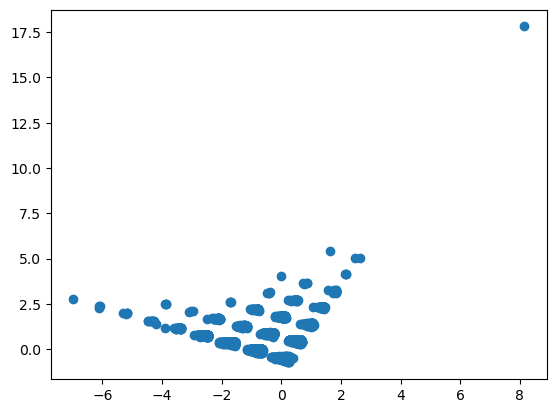

In [12]:
plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1])
plt.show()